# **PREPROCESAMIENTO.**

**1. Carga de dataset y liberías necesarias.**

Se cargan las librerías estudiadas en el curso y que resultan de utilidad para la manipulación del dataset. Además se configuran ciertos parámetros de visualización de acuerdo al criterio propio.

In [2]:
# Librerías.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

z = pd.read_csv('train.csv') # Carga del dataset de entrenamiento.

# Visualización
pd.set_option('display.max_columns', None) # Mostrar todas las columnas del dataset sin truncarlas.
sns.set(style='whitegrid') # Fondo blanco.

# Vista general
print("Dimensiones del dataset:", z.shape)
z.head()

Dimensiones del dataset: (692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


**2. Revisión preliminar.**

Se busca inspeccionar visualmente los tipos de variables (categóricas vs numéricas) que contiene el dataset además de identificar variables con conteos menores al total de datos (datos ausentes) y variable duplicadas.

In [ ]:
# Tipos de variables y valores nulos
z.info()

# Resumen estadístico
z.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,692500.0,NaN,NaN,NaN,494606.130576,285585.209455,1.0,247324.75,494564.5,741782.5,989286.0
PERIODO_ACADEMICO,692500.0,NaN,NaN,NaN,20198.366679,10.535037,20183.0,20195.0,20195.0,20203.0,20213.0
E_PRGM_ACADEMICO,692500,948,DERECHO,53244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E_PRGM_DEPARTAMENTO,692500,31,BOGOTÁ,282159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E_VALORMATRICULAUNIVERSIDAD,686213,8,Entre 1 millón y menos de 2.5 millones,204048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E_HORASSEMANATRABAJA,661643,5,Más de 30 horas,249352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_ESTRATOVIVIENDA,660363,7,Estrato 2,232671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_TIENEINTERNET,665871,2,Si,592514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_EDUCACIONPADRE,669322,12,Secundaria (Bachillerato) completa,128289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_TIENELAVADORA,652727,2,Si,563390,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2.1. Análisis de columnas duplicadas**

Se identificaron dos variables `F_TIENEINTERNET` y `F_TIENEINTERNET.1` de las cuales se sospecha son idénticas, pasaremos a explorar su conteo y distribución para confirmar esta hipótesis. En caso afirmativo se conservará solo una.

In [ ]:
display(z['F_TIENEINTERNET'].value_counts())
display(z['F_TIENEINTERNET.1'].value_counts())

In [3]:
z = z.drop(columns=['F_TIENEINTERNET.1']) #Se elimina la variabe repetida F_TIENEINTERNET.1

**2.2. Análisis de datos faltantes/nulos.**

Se identificaron varias variables con conteos inferiores a 692500 (cantidad total de IDs en el dataset).

In [ ]:
#Análisis de datos faltantes
resumen_faltantes = (z.isna().sum().reset_index().rename(columns={"index": "Variable", 0: "Valores_Faltantes"}))
resumen_faltantes["Total_Registros"] = len(z) #Total de registros en dataframe
resumen_faltantes["Porcentaje_Faltantes"] = (resumen_faltantes["Valores_Faltantes"] / len(z) * 100).round(2) #Porcentaje de datos faltantes
resumen_faltantes = resumen_faltantes.sort_values(by="Valores_Faltantes", ascending=False) #Ordenar descedentemente de acuerdo al porcentaje de datos faltantes
display(resumen_faltantes)

,Variable,Valores_Faltantes,Total_Registros,Porcentaje_Faltantes
10,F_TIENEAUTOMOVIL,43623,692500,6.30
9,F_TIENELAVADORA,39773,692500,5.74
13,F_TIENECOMPUTADOR,38103,692500,5.50
6,F_ESTRATOVIVIENDA,32137,692500,4.64
5,E_HORASSEMANATRABAJA,30857,692500,4.46
7,F_TIENEINTERNET,26629,692500,3.85
14,F_EDUCACIONMADRE,23664,692500,3.42
8,F_EDUCACIONPADRE,23178,692500,3.35
12,E_PAGOMATRICULAPROPIO,6498,692500,0.94
4,E_VALORMATRICULAUNIVERSIDAD,6287,692500,0.91


Para las variables categóricas con ausencia de datos se rellena con la categoria **Sin Info** para homogenizar el dataframe.

*Cabe aclarar que todas las variables con ausencia de datos son categóricas y la ausencia de datos por variable está acotada superiormente por el 7%.*

In [4]:
var_categoricas_sin_datos = ['E_VALORMATRICULAUNIVERSIDAD','E_HORASSEMANATRABAJA', 'E_PAGOMATRICULAPROPIO', 'F_ESTRATOVIVIENDA',
                     'F_TIENEINTERNET', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL','F_TIENECOMPUTADOR','F_EDUCACIONPADRE', 'F_EDUCACIONMADRE']
z[var_categoricas_sin_datos] = z[var_categoricas_sin_datos].fillna('Sin Info')
z.isna().sum() #confirmar que ya hoy datos ausentes en el dataframe.

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,0
E_HORASSEMANATRABAJA,0
F_ESTRATOVIVIENDA,0
F_TIENEINTERNET,0
F_EDUCACIONPADRE,0
F_TIENELAVADORA,0


**3. Manipulación de datos.**

Una vez "limpios" se procede a manipular los datos con la finalidad de facilitar su uso posterior para la generación del modelo de aprendizaje automático el cual predecirá la variable objetivo: `RENDIMIENTO_GLOBAL`

**3.1 Conversión de variables categóricas a numéricas.**

De acuerdo con el análisis preliminar se identificaron tres variables además de la variable objetivo las cuales son categóricas ordinales, sin embargo, a criterio del equipo de trabajo se decide convertirlas en variables numéricas para facilitar su manipulación.

Estas variables son:

`E_VALORMATRICULAUNIVERSIDAD` y `E_HORASSEMANATRABAJA`, las cuales fueron mapeadas en el punto medio del intervalo descrito.

`F_ESTRATOVIVIENDA`, la cual se mapeó como un número entero entre 1-6.

`RENDIMIENTO_GLOBAL`, la cual se mapeó así: bajo=1, medio-bajo=2, medio-alto=3 y alto=4.

**NOTA: para los casos de No Info se utilizó el -1.**



**Valor de matrícula**

In [5]:
# Normalizamos los valores de texto para evitar problemas por tildes, mayúsculas o espacios
z['E_VALORMATRICULAUNIVERSIDAD'] = z['E_VALORMATRICULAUNIVERSIDAD'].astype(str).str.strip()

# Se asigna a cada categoría el punto medio del intervalo
# 7.75 es un valor ordinario que se asigna para el intervalo >7M.
mapa_matricula = {
    'Menos de 500 mil': 0.25,
    'Entre 500 mil y menos de 1 millón': 0.75,
    'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'Más de 7 millones': 7.75,
    'No pagó matrícula': 0.0,
    'Sin Info': -1
}

z['E_VALORMATRICULA_NUMERICA'] = z['E_VALORMATRICULAUNIVERSIDAD'].map(mapa_matricula)
z['E_VALORMATRICULA_NUMERICA'].fillna(z['E_VALORMATRICULA_NUMERICA'].mean(), inplace=True)

print(z[['E_VALORMATRICULAUNIVERSIDAD', 'E_VALORMATRICULA_NUMERICA']].head())


                E_VALORMATRICULAUNIVERSIDAD  E_VALORMATRICULA_NUMERICA
0  Entre 5.5 millones y menos de 7 millones                       6.25
1  Entre 2.5 millones y menos de 4 millones                       3.25
2  Entre 2.5 millones y menos de 4 millones                       3.25
3  Entre 4 millones y menos de 5.5 millones                       4.75
4  Entre 2.5 millones y menos de 4 millones                       3.25


/tmp/ipython-input-909519408.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['E_VALORMATRICULA_NUMERICA'].fillna(z['E_VALORMATRICULA_NUMERICA'].mean(), inplace=True)


In [6]:
display(z['E_VALORMATRICULA_NUMERICA'].value_counts())

,count
E_VALORMATRICULA_NUMERICA,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


**Horas semanales que trabaja**

In [7]:
# Normalizamos los valores de texto para evitar problemas por tildes, mayúsculas o espacios
z['E_HORASSEMANATRABAJA'] = z['E_HORASSEMANATRABAJA'].astype(str).str.strip()

mapa_horas = {
    '0': 0,                       # No trabaja
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35,
    'Sin Info': np.nan
}

z['E_HORASSEMANATRABAJA_NUMERICA'] = z['E_HORASSEMANATRABAJA'].map(mapa_horas)

z['E_HORASSEMANATRABAJA_NUMERICA'].fillna(-1, inplace=True)

# Verificar valores únicos y primeras filas
print(z['E_HORASSEMANATRABAJA'].unique())
print(z[['E_HORASSEMANATRABAJA', 'E_HORASSEMANATRABAJA_NUMERICA']].head(10))


['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas' 'Sin Info']
  E_HORASSEMANATRABAJA  E_HORASSEMANATRABAJA_NUMERICA
0    Menos de 10 horas                            5.0
1                    0                            0.0
2      Más de 30 horas                           35.0
3                    0                            0.0
4  Entre 21 y 30 horas                           25.0
5    Menos de 10 horas                            5.0
6  Entre 21 y 30 horas                           25.0
7  Entre 11 y 20 horas                           15.0
8    Menos de 10 horas                            5.0
9      Más de 30 horas                           35.0


/tmp/ipython-input-895878797.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['E_HORASSEMANATRABAJA_NUMERICA'].fillna(-1, inplace=True)


In [8]:
display(z['E_HORASSEMANATRABAJA_NUMERICA'].value_counts())

,count
E_HORASSEMANATRABAJA_NUMERICA,
35.0,249352
0.0,116550
15.0,115857
25.0,92693
5.0,87191
-1.0,30857


**Estrato de vivienda**

In [9]:
# Normalizamos los valores de texto para evitar problemas por tildes, mayúsculas o espacios
z['F_ESTRATOVIVIENDA'] = z['F_ESTRATOVIVIENDA'].astype(str).str.strip()

mapa_estrato = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Info': -1,
    'Sin Estrato': -1
}

z['F_ESTRATOVIVIENDA_NUM'] = z['F_ESTRATOVIVIENDA'].map(mapa_estrato)

print(z[['F_ESTRATOVIVIENDA', 'F_ESTRATOVIVIENDA_NUM']].head(10))
print(z['F_ESTRATOVIVIENDA_NUM'].value_counts(dropna=False))

  F_ESTRATOVIVIENDA  F_ESTRATOVIVIENDA_NUM
0         Estrato 3                      3
1         Estrato 3                      3
2         Estrato 3                      3
3         Estrato 4                      4
4         Estrato 3                      3
5         Estrato 5                      5
6         Estrato 2                      2
7         Estrato 2                      2
8         Estrato 1                      1
9         Estrato 5                      5
F_ESTRATOVIVIENDA_NUM
 2    232671
 3    210685
 1    111991
 4     65514
-1     35426
 5     23608
 6     12605
Name: count, dtype: int64


In [10]:
display(z['F_ESTRATOVIVIENDA_NUM'].value_counts())

,count
F_ESTRATOVIVIENDA_NUM,
2,232671
3,210685
1,111991
4,65514
-1,35426
5,23608
6,12605


**Rendimiento global en la prueba**

In [11]:
# Normalizamos los valores de texto para evitar problemas por tildes, mayúsculas o espacios
z['RENDIMIENTO_GLOBAL'] = z['RENDIMIENTO_GLOBAL'].astype(str).str.strip().str.lower()

mapa_rendimiento = {
    'bajo': 1,
    'medio-bajo': 2,
    'medio-alto': 3,
    'alto': 4
}

z['RENDIMIENTO_GLOBAL_NUM'] = z['RENDIMIENTO_GLOBAL'].map(mapa_rendimiento)

print(z[['RENDIMIENTO_GLOBAL', 'RENDIMIENTO_GLOBAL_NUM']].head(10))
print(z['RENDIMIENTO_GLOBAL_NUM'].value_counts(dropna=False))

  RENDIMIENTO_GLOBAL  RENDIMIENTO_GLOBAL_NUM
0         medio-alto                       3
1               bajo                       1
2               bajo                       1
3               alto                       4
4         medio-bajo                       2
5         medio-alto                       3
6               alto                       4
7         medio-bajo                       2
8         medio-bajo                       2
9               alto                       4
RENDIMIENTO_GLOBAL_NUM
4    175619
1    172987
2    172275
3    171619
Name: count, dtype: int64


In [12]:
display(z['RENDIMIENTO_GLOBAL_NUM'].value_counts())

,count
RENDIMIENTO_GLOBAL_NUM,
4,175619
1,172987
2,172275
3,171619


Finalmente, tras la conversión resultaron cuatro nuevas variables numéricas: `E_VALORMATRICULA_NUMERICA`, `E_HORASSEMANATRABAJA_NUMERICA`, `F_ESTRATOVIVIENDA_NUM` y `RENDIMIENTO_GLOBAL_NUM`.

**3.2. Generación de submodelo.**

Para trabajar más comodamente, se generó un submodelo en el que se reemplazaban las variables recién convertidas a numéricas y el resto de variables categóricas.

In [14]:
# Copia del dataset
z_preprocesado = z.copy()

# Se eliminan las variables categóricas originales que ya fueron convertidas
z_preprocesado = z_preprocesado.drop(columns=[
    'E_VALORMATRICULAUNIVERSIDAD',
    'E_HORASSEMANATRABAJA',
    'F_ESTRATOVIVIENDA',
    'RENDIMIENTO_GLOBAL'
])

# Renombramos las versiones numéricas para mantener el nombre original
z_preprocesado = z_preprocesado.rename(columns={
    'E_VALORMATRICULA_NUMERICA': 'E_VALORMATRICULAUNIVERSIDAD',
    'E_HORASSEMANATRABAJA_NUMERICA': 'E_HORASSEMANATRABAJA',
    'F_ESTRATOVIVIENDA_NUM': 'F_ESTRATOVIVIENDA',
    'RENDIMIENTO_GLOBAL_NUM': 'RENDIMIENTO_GLOBAL'
})

# Verificamos el resultado
print(z_preprocesado.dtypes)

ID                               int64
PERIODO_ACADEMICO                int64
E_PRGM_ACADEMICO                object
E_PRGM_DEPARTAMENTO             object
F_TIENEINTERNET                 object
F_EDUCACIONPADRE                object
F_TIENELAVADORA                 object
F_TIENEAUTOMOVIL                object
E_PRIVADO_LIBERTAD              object
E_PAGOMATRICULAPROPIO           object
F_TIENECOMPUTADOR               object
F_EDUCACIONMADRE                object
INDICADOR_1                    float64
INDICADOR_2                    float64
INDICADOR_3                    float64
INDICADOR_4                    float64
E_VALORMATRICULAUNIVERSIDAD    float64
E_HORASSEMANATRABAJA           float64
F_ESTRATOVIVIENDA                int64
RENDIMIENTO_GLOBAL               int64
dtype: object


**4. Exploración del dataset preprocesado.**

Se explorarán las relación entre las variables categóricas y numéricas además de la variable objetivo, esto con el objetivo de identificar oportunidades para reducir la dimensionalidad del modelo a construir.

In [15]:
# Excluimos ID del análisis
z_analisis = z_preprocesado.drop(columns=['ID'])

**4.1 Variable objetivo.**

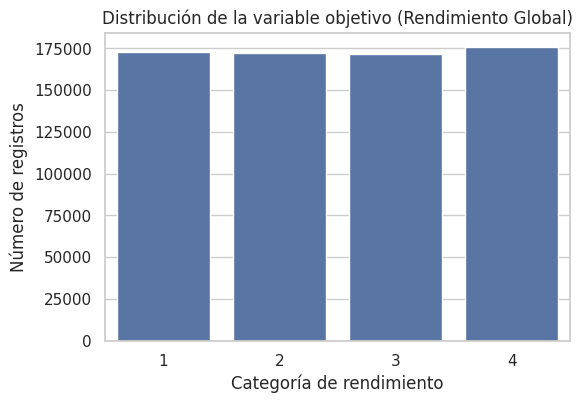

In [16]:
#Distribución de la variable objetivo.
plt.figure(figsize=(6,4))
sns.countplot(data=z_analisis, x='RENDIMIENTO_GLOBAL', order=sorted(z_analisis['RENDIMIENTO_GLOBAL'].unique()))
plt.title("Distribución de la variable objetivo (Rendimiento Global)")
plt.xlabel("Categoría de rendimiento")
plt.ylabel("Número de registros")
plt.show()

**4.2 Variables numéricas.**

Variables numéricas consideradas:
['PERIODO_ACADEMICO', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']


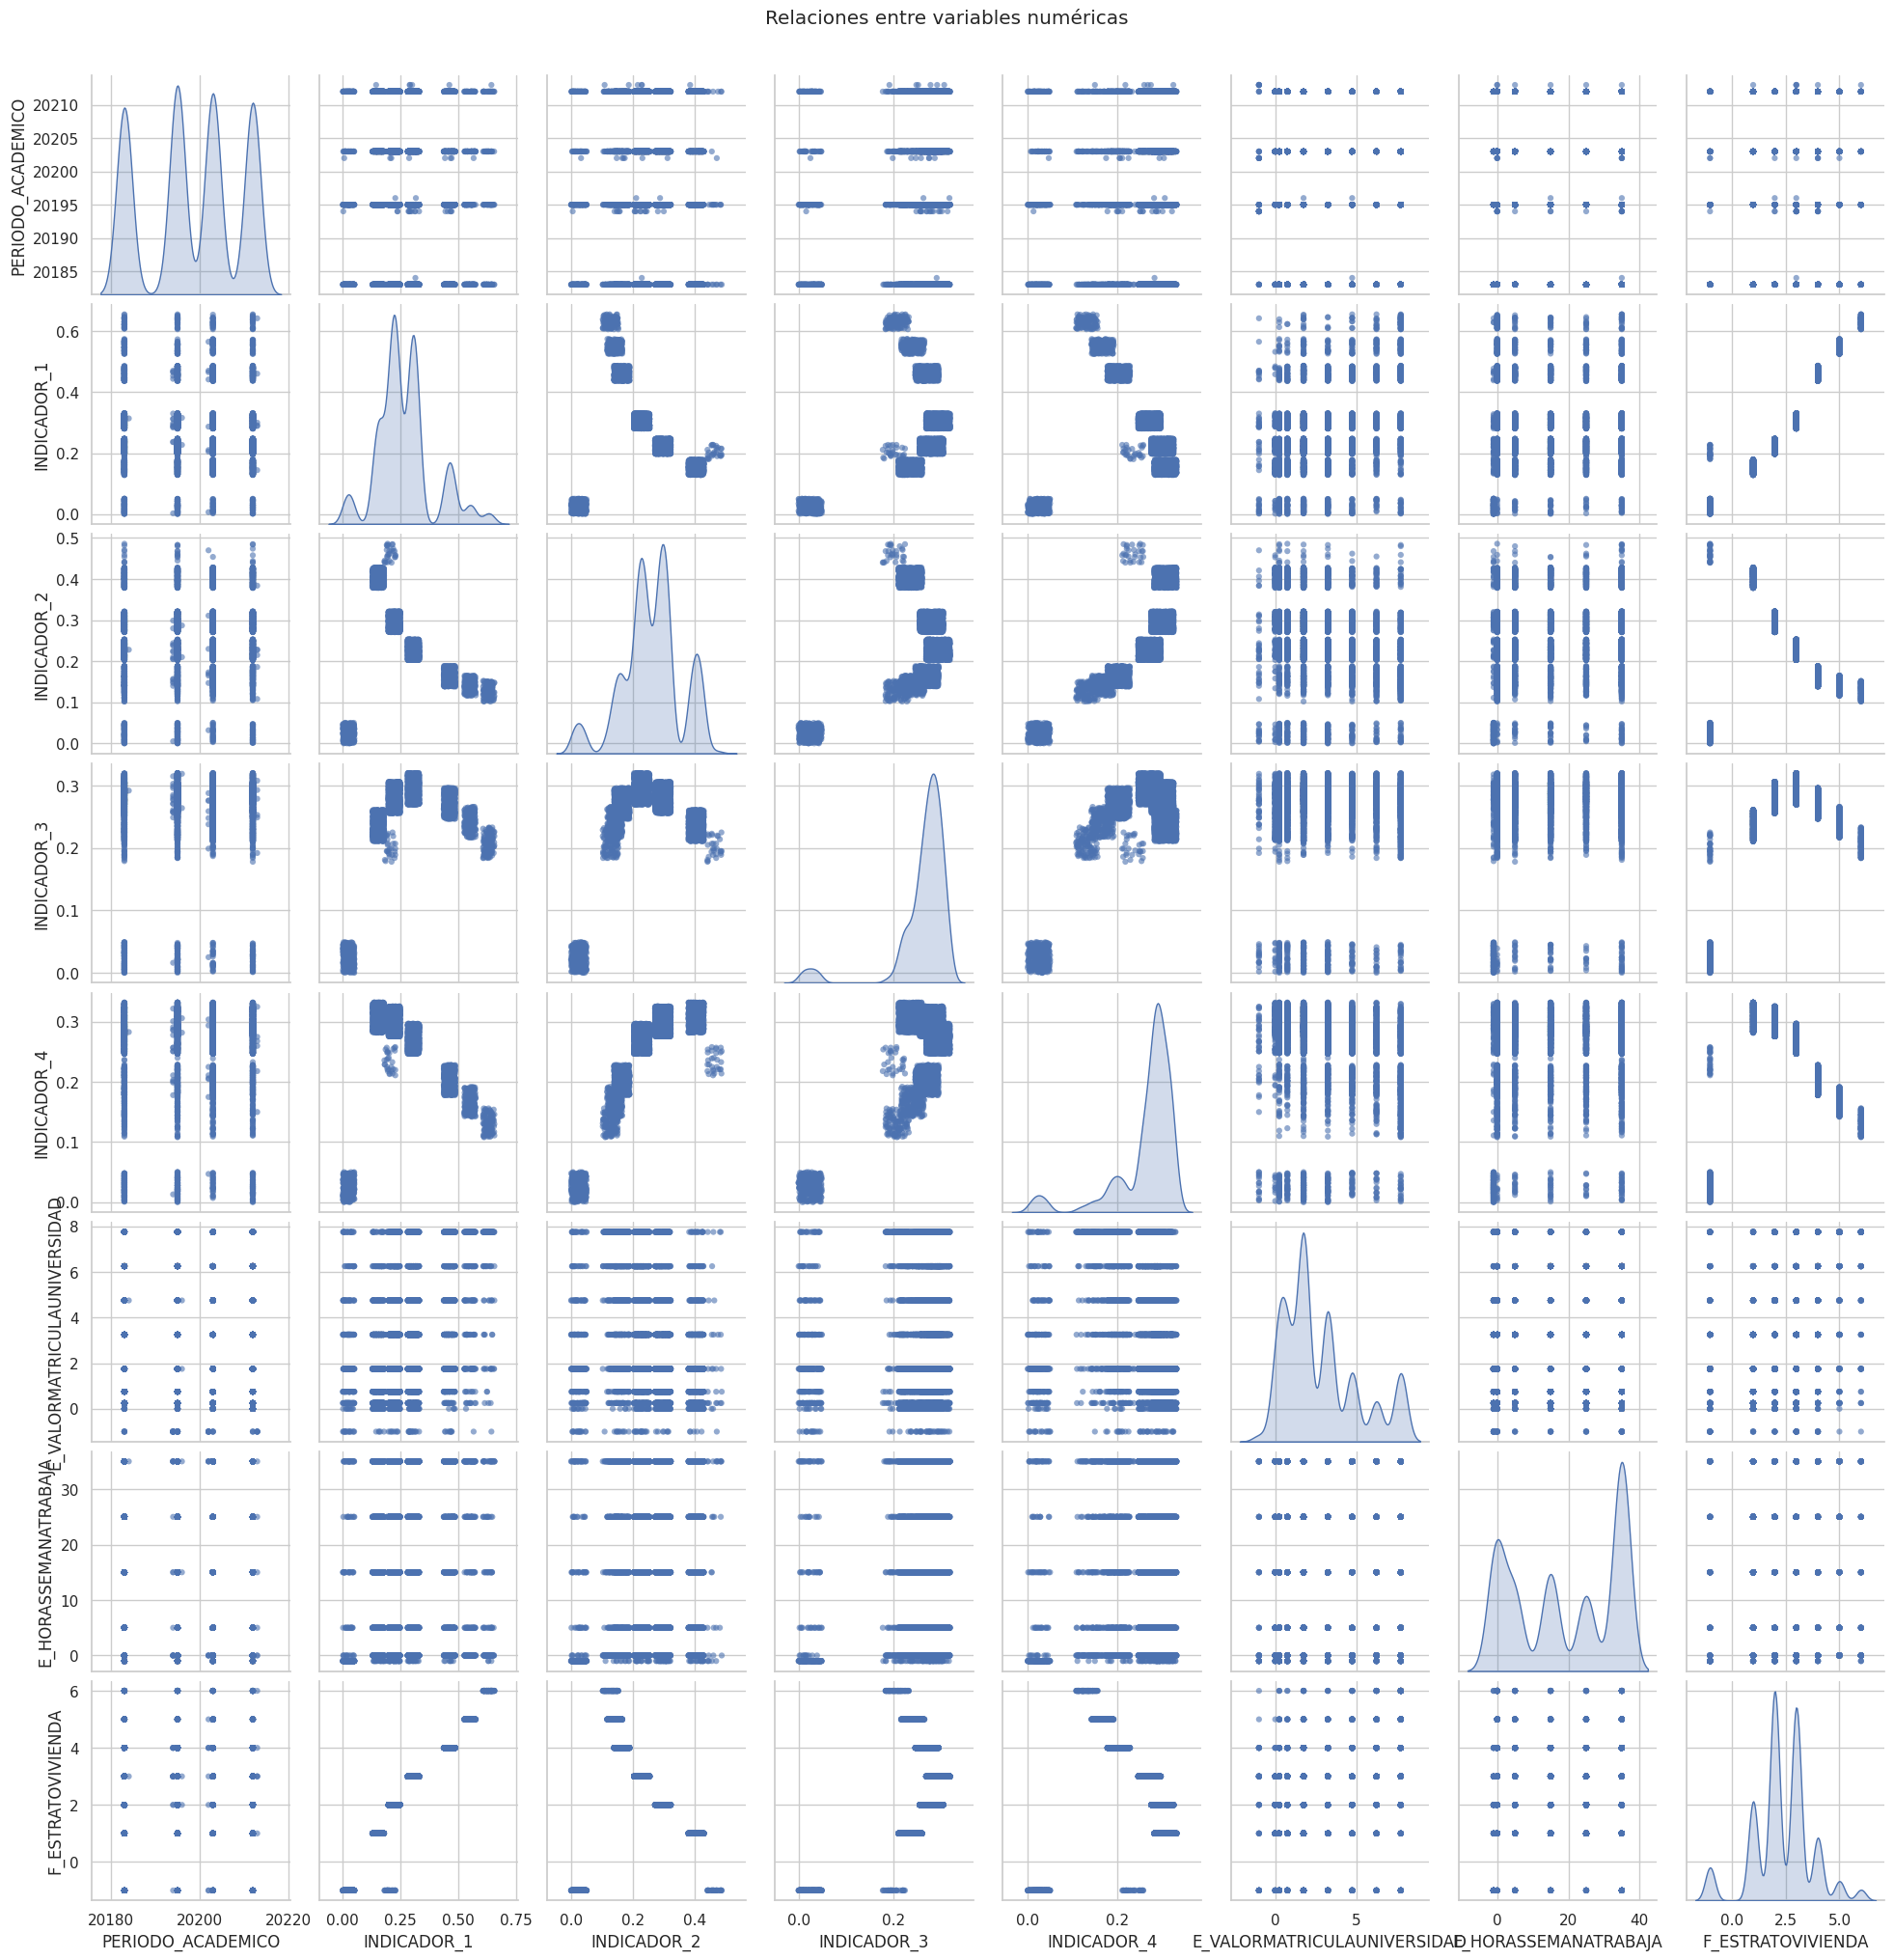

In [22]:
##DIAGRAMA DE PARES o PAIRPLOT.
#Seleccionamos solo las variables numéricas
num_vars = z_analisis.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables numéricas consideradas:")
print(num_vars)

# Ensure 'RENDIMIENTO_GLOBAL' is in num_vars for sampling
if 'RENDIMIENTO_GLOBAL' not in num_vars:
  num_vars.append('RENDIMIENTO_GLOBAL')

#Tomamos una muestra aleatoria de 6925 (1% del dataset) datos para evitar sobrecargar el gráfico
z_sample = z_analisis[num_vars].sample(6925, random_state=42)

# Pairplot general
sns.pairplot(data=z_sample,vars=[col for col in num_vars if col != 'RENDIMIENTO_GLOBAL'], diag_kind='kde',plot_kws={'alpha': 0.6, 's': 20, 'edgecolor': 'none'})
plt.suptitle("Relaciones entre variables numéricas", y=1.02)
plt.show()

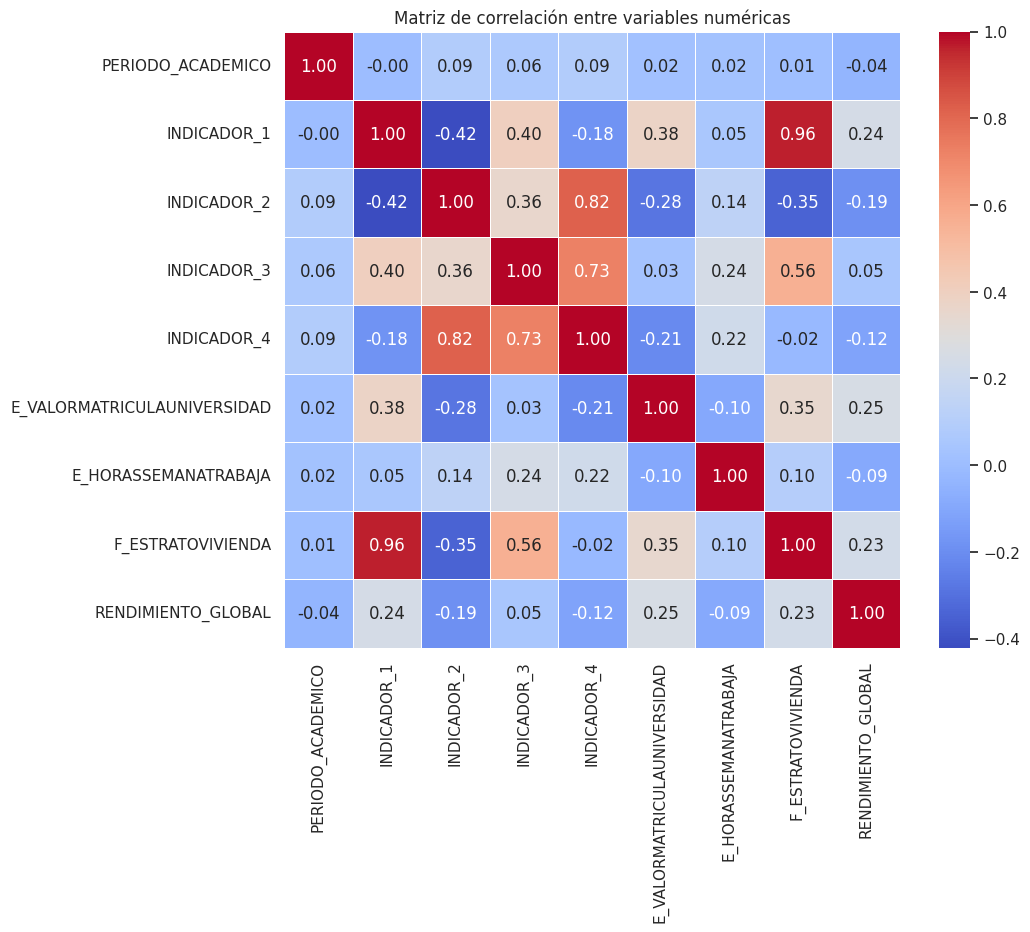

Correlación de las variables con RENDIMIENTO_GLOBAL:


,RENDIMIENTO_GLOBAL
RENDIMIENTO_GLOBAL,1.000000
E_VALORMATRICULAUNIVERSIDAD,0.254965
INDICADOR_1,0.242854
F_ESTRATOVIVIENDA,0.232179
INDICADOR_3,0.049383
PERIODO_ACADEMICO,-0.042260
E_HORASSEMANATRABAJA,-0.092427
INDICADOR_4,-0.119497
INDICADOR_2,-0.190022


In [24]:
##MATRIZ DE CORRELACIONES.
#Se utiliza la variable num_vars previamente definida

#Calcular matriz de correlación
corr_matrix = z_analisis[num_vars].corr()

# Visualizar el mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

#Correlación de las variables con la variable objetivo
target_corr = corr_matrix['RENDIMIENTO_GLOBAL'].sort_values(ascending=False)
print("Correlación de las variables con RENDIMIENTO_GLOBAL:")
display(target_corr)

En la matriz de correlación se observa que la mayoría de las variables numéricas presentan correlaciones débiles o moderadas, lo cual indica baja colinealidad entre ellas. Sin embargo, se identifican algunos casos relevantes:

* Los indicadores presentan relaciones entre sí, destacando una correlación alta entre `INDICADOR_2` e `INDICADOR_4` (r = +0.82) y entre `INDICADOR_3` e `INDICADOR_4` (r = +0.73). Estas correlaciones podrían ser un indicio de redundancia parcial en la información que capturan estas variables.

* `F_ESTRATOVIVIENDA` muestra una correlación muy alta con `INDICADOR_1` (r = +0.96), lo cual sugiere que podrían estar midiendo dimensiones muy similares. Ya que se desconoce exactamente qué es lo que se mide con `INDICADOR_1` se evaluará la pertinencia de mantener esta variable en el modelo.

* Las demás variables, incluyendo `E_VALORMATRICULAUNIVERSIDAD`, `E_HORASSEMANATRABAJA` y `RENDIMIENTO_GLOBAL`, presentan correlaciones bajas con el resto, lo cual es favorable para mantenerlas en el modelo.






**4.3 Variables categóricas.**

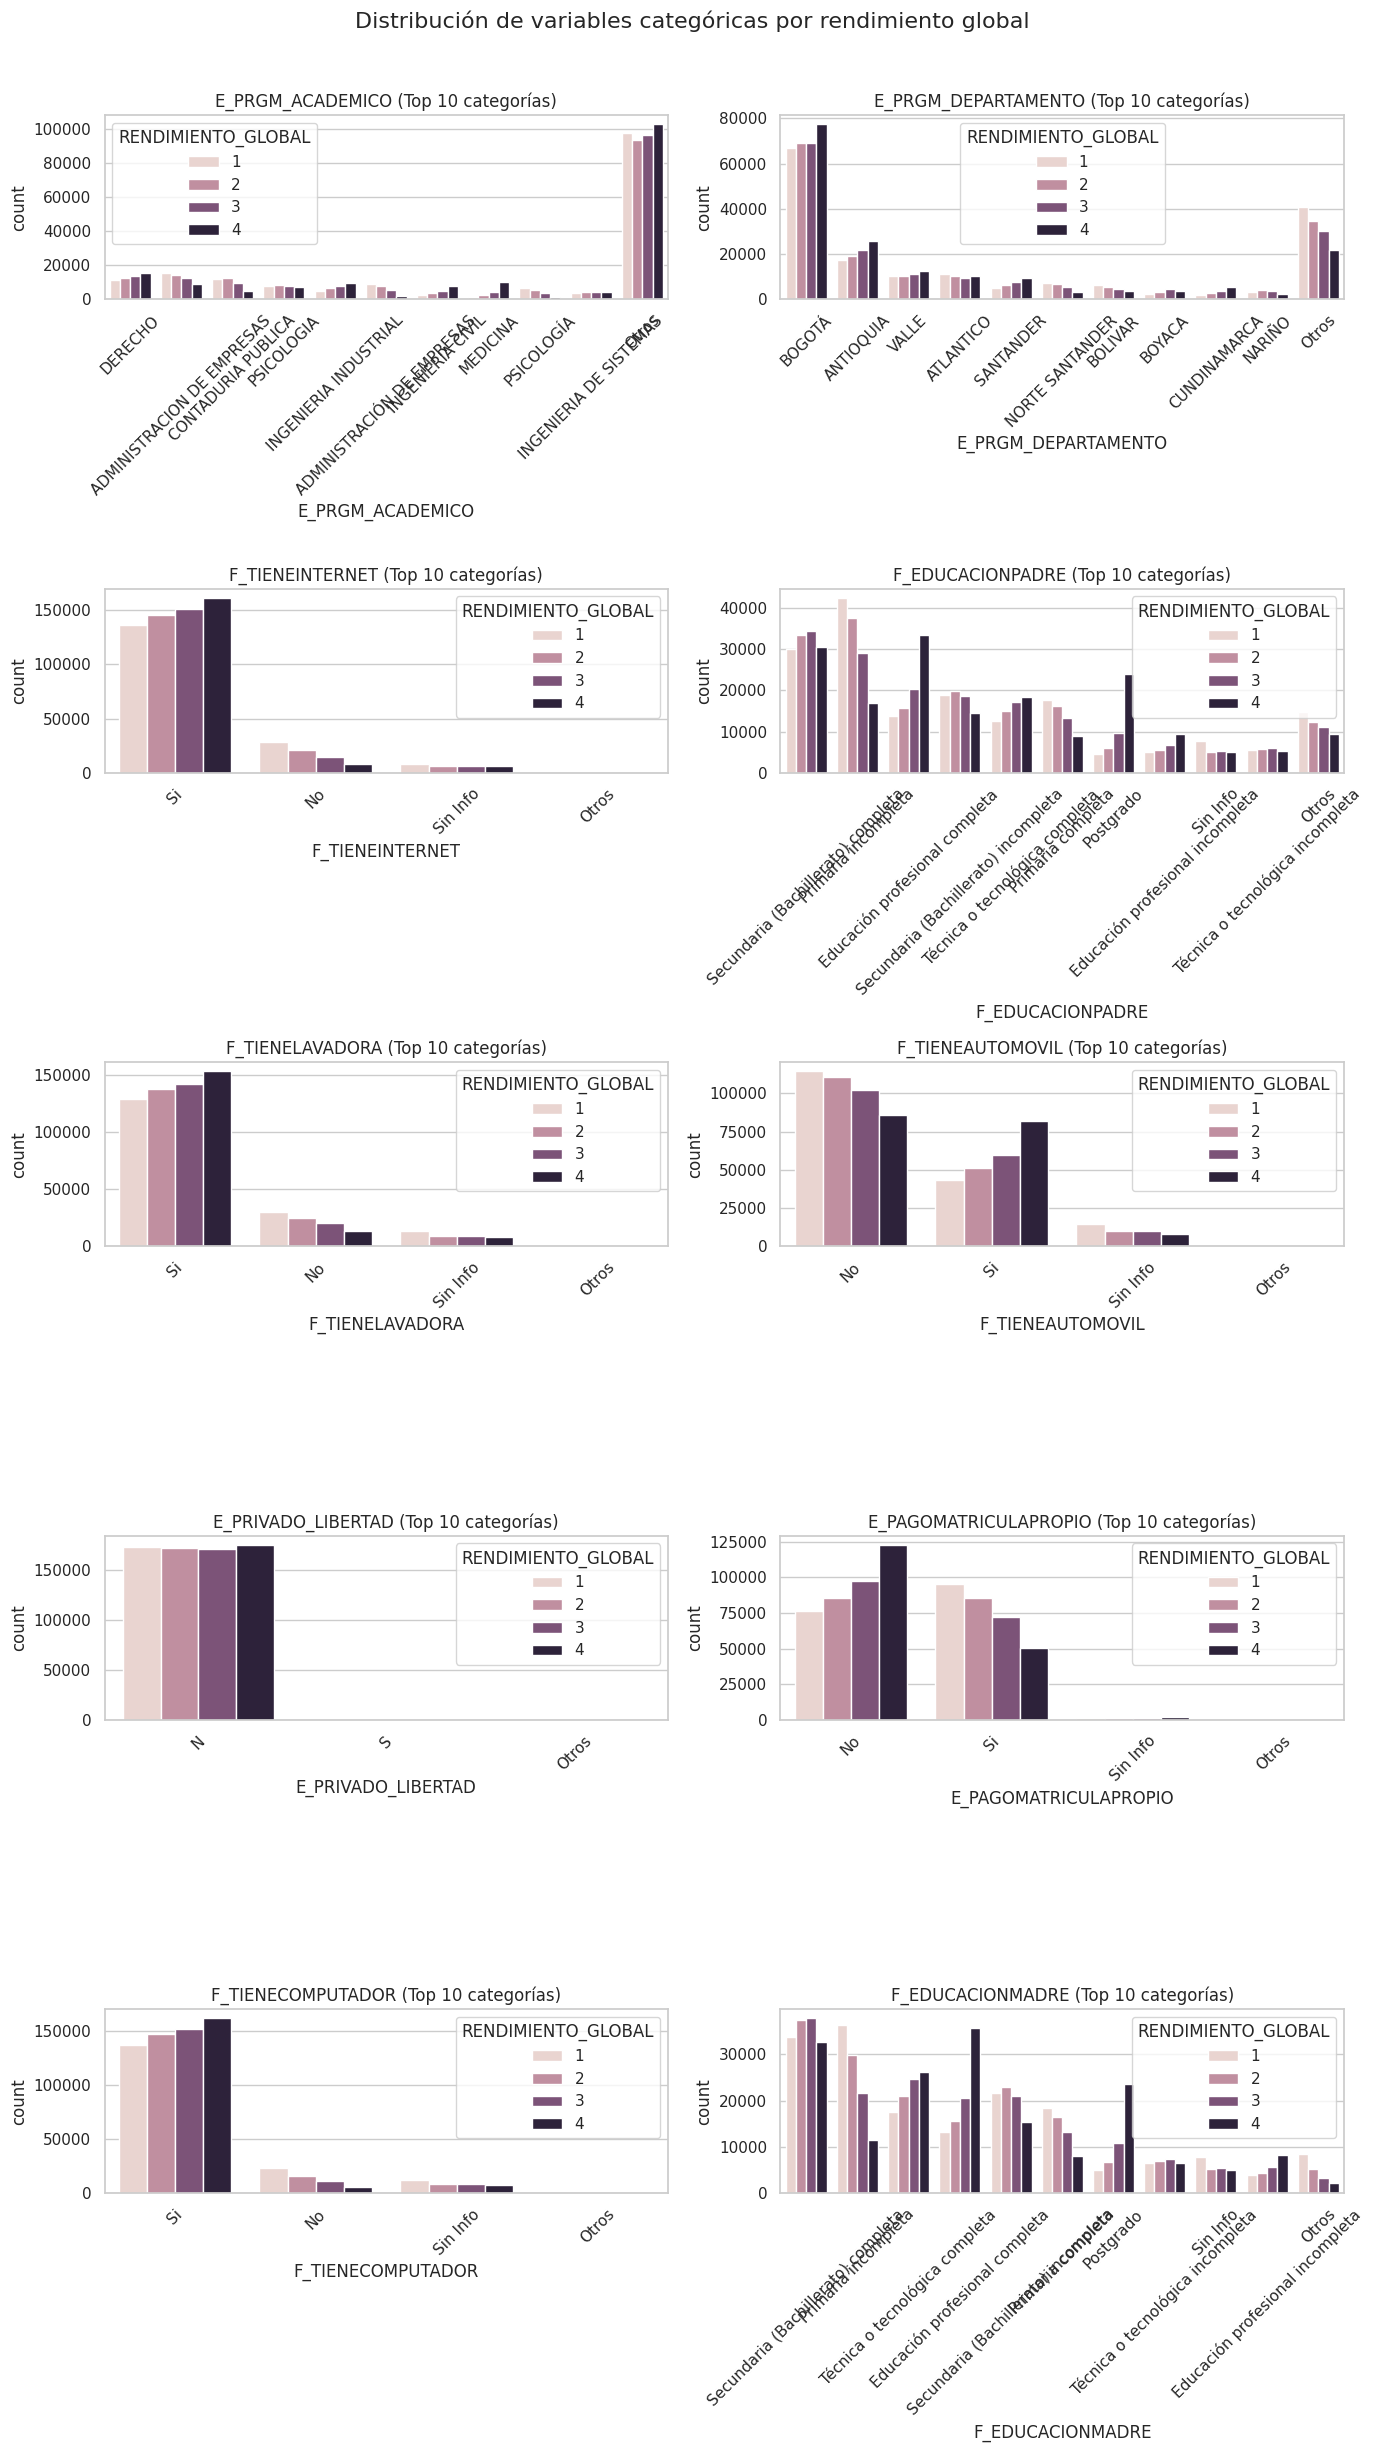

In [32]:
import math

#Seleccionamos solo las variables categóricas
cat_vars = z_analisis.select_dtypes(include=['object']).columns

#Definimos el tamaño del mosaico
n_cols = 2  #columnas
n_rows = math.ceil(len(cat_vars) / n_cols)  #filas

#Creamos la figura general
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()  # para iterar fácilmente sobre los ejes

# Iteramos sobre las variables categóricas
for i, col in enumerate(cat_vars):
    # Tomamos las 10 categorías más frecuentes
    top_10 = z_analisis[col].value_counts().nlargest(10).index

    # Creamos una copia temporal con "Otros" agrupando las categorías menos frecuentes
    temp = z_analisis.copy()
    temp[col] = temp[col].where(temp[col].isin(top_10), other='Otros')

    # Gráfico en el mosaico
    sns.countplot(data=temp, x=col, hue='RENDIMIENTO_GLOBAL',
                  order=top_10.tolist() + ['Otros'], ax=axes[i])
    axes[i].set_title(f"{col} (Top 10 categorías)", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminamos subplots vacíos si hay más ejes que variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribución de variables categóricas por rendimiento global", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

En la exploración de las variables categóricas se observan patrones diferenciados en la distribución del rendimiento global según las características del estudiante y su entorno. Variables como `F_TIENEINTERNET`, `F_TIENE COMPUTADOR` y `F_TIENE LAVADORA` muestran una clara tendencia: **los estudiantes con acceso a estos recursos presentan en general un mejor rendimiento.**

En contraste, variables como `E_PRGM_ACADÉMICO` y `E_PRGM_DEPARTAMENTO` exhiben una alta dispersión entre categorías, lo que sugiere que **el rendimiento puede estar influido por factores asociados al programa académico o la región de procedencia**.

Finalmente, las variables relacionadas con el nivel educativo de los padres (`F_EDUCACIONPADRE` y `F_EDUCACIONMADRE`) también evidencian una relación positiva con el rendimiento global, indicando que **un mayor nivel educativo en el hogar podría asociarse con mejores resultados académicos**.